# Keyword Analysis and Visualization Documentation

## Introduction
This documentation outlines the usage and functionality of a Python script designed for analyzing and visualizing keywords related to cancer within a dataset of forum comments. The script extracts keywords, generates a word cloud, and associates keywords with their corresponding types.

## Required Libraries
The script utilizes the following libraries:

- pandas: For data manipulation and analysis.
- matplotlib.pyplot: For generating visualizations, such as the word cloud.
- wordcloud: For creating word cloud visualizations.
- numpy: For numerical operations and data handling.

## Script Explanation
The script can be divided into several sections, each serving a specific purpose:

1. Importing Libraries : 
    This section imports the necessary libraries for data processing, visualization, and analysis.
2. Loading and Preparing Data : 

    Here, the script loads a CSV file containing keywords related to cancer and filters the DataFrame to include only rows where the 'keyword' column is equal to 1 (indicating keywords).
3. Creating a Word Cloud :

This section generates a word cloud visualization using the keywords and their frequencies. The word cloud image is displayed using Matplotlib.

4. Loading Merged Data: reads another CSV file containing preprocessed data from various forums.

5. Filtering Cancer Question: queries the preprocessed data to select only rows with questions from the "cancer" forum type.
6. Matching Keywords with Comments : 

This section matches the cancer-related keywords with the comments in the 'cancer_questions' DataFrame, storing the matched keywords.

7. Matching Keywords to Types : defines a function to map matched keywords to their corresponding types using a pre-defined mapping. It applies the function to associate keywords with their types and returns the filtered DataFrame.

## How to Use
1. Ensure that the required CSV files are present in the specified directories.
2. Install the required libraries if not already installed (pandas, matplotlib, wordcloud, numpy).
3. Run the script using a Python interpreter.
4. Observe the generated word cloud visualization showing cancer-related keywords.
5. Review the associated keywords and their corresponding types within the cancer-related questions.

## Importing libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [2]:
cancer_words = pd.read_csv('csvs//keywords_cancer.csv')
cancer_words.head(5)

,word,count,keyword,type
0,for,2389,0,NaN
1,any,290,0,NaN
2,comment,1096,0,NaN
3,only,4260,0,NaN
4,skimmer,5663,0,NaN


In [3]:
keywords_df = cancer_words.query('keyword==1')
word_frq = dict(zip(keywords_df['word'], keywords_df['count']))

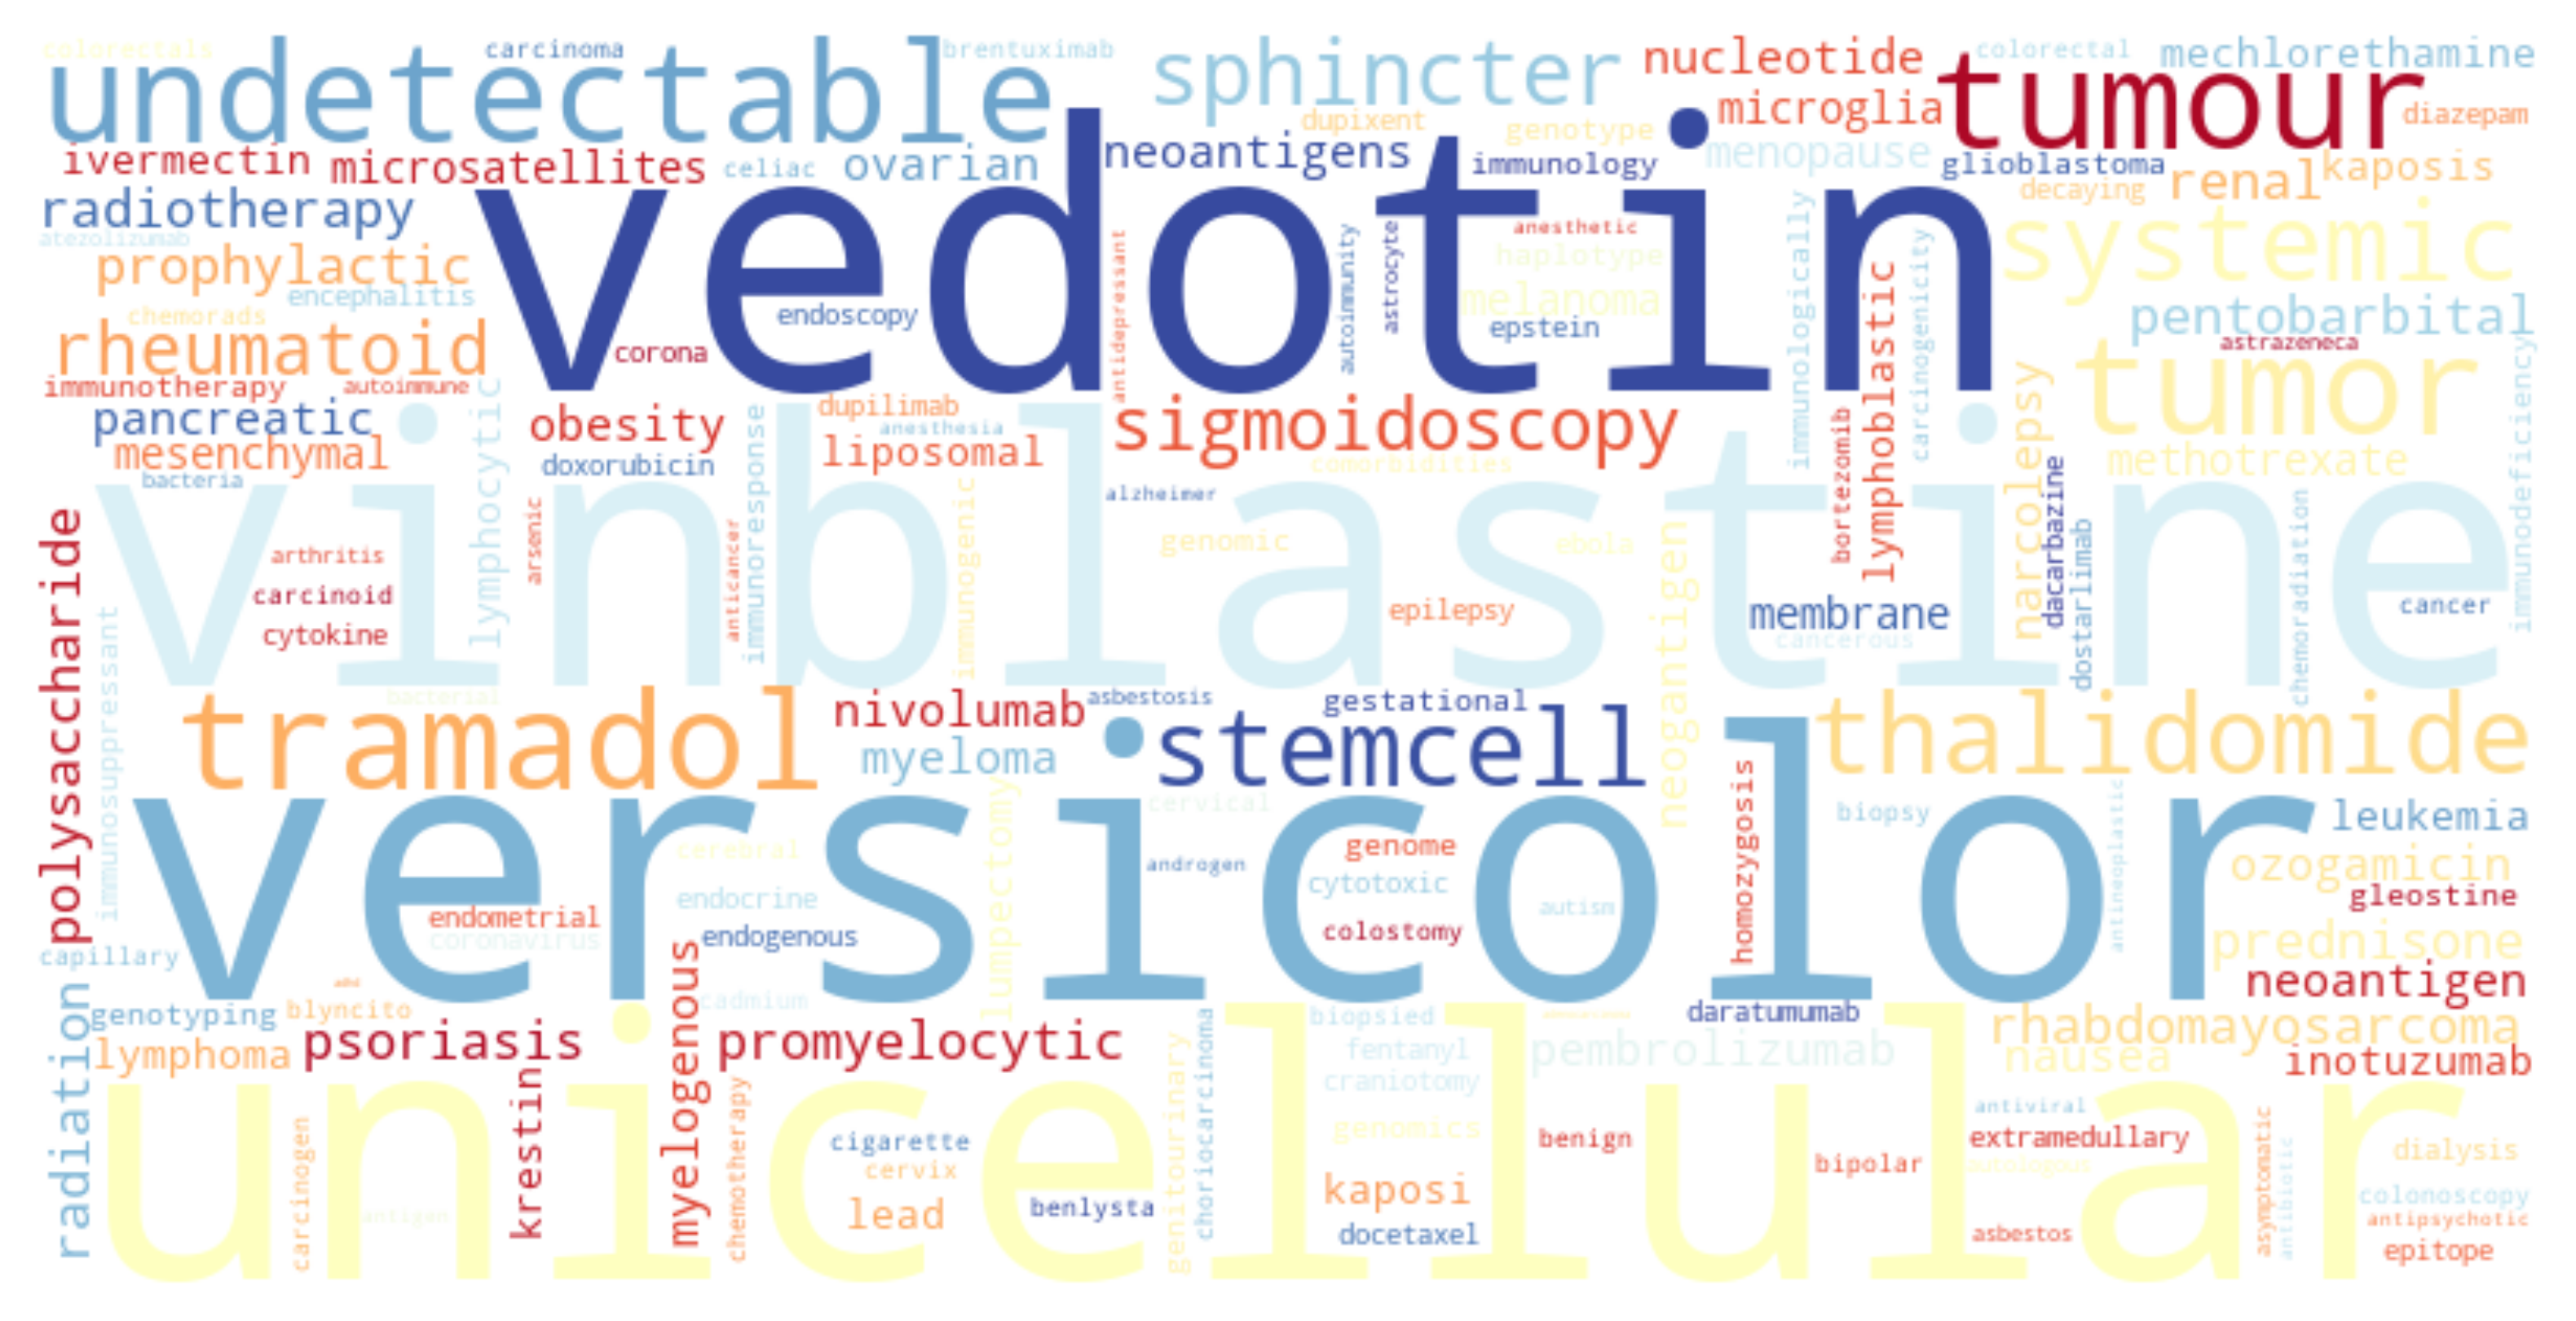

In [4]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu')\
                    .generate_from_frequencies(word_frq)

# Plot the word cloud
plt.figure(figsize=(10, 5) , dpi = 400)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
all_comments = pd.read_csv('csvs//merged.csv')

In [6]:
#Query to view only cancer type questions
cancer_questions = all_comments.query('question.notna() & type == "cancer"')\
                            .reset_index(drop=True)

## Matching keywords with comments


In [7]:

keyword_pattern = '|'.join(keywords_df['word'])

cancer_questions['matched_keywords'] = cancer_questions['comments'].str.findall(keyword_pattern)
cancer_questions['matched_keywords'] =cancer_questions['matched_keywords'].apply(lambda y: np.nan if len(y)==0 else y)

### Match keywords to return thier types

In [29]:
def get_keyword_types(text):
    matched_types = [keyword_type_map[keyword] for keyword in keyword_type_map if keyword in text]
    return matched_types if matched_types else np.nan

# Create a dictionary to map keywords to their types
keyword_type_map = dict(zip(keywords_df['word'], keywords_df['type']))

# Apply the function to the 'comments' column to get the matched keyword types
cancer_questions['matched_keyword_types'] = cancer_questions['comments'].apply(get_keyword_types)


In [34]:
cancer_questions.query('matched_keywords.notna()')

,comments,type,question,matched_keywords,matched_keyword_types
0,for any comment only skimmer who are wondering...,cancer,who,"[cancer, cancer]",[cancer_related]
2,what if your child grows up and cure cancer ...,cancer,what,[cancer],[cancer_related]
3,news like this fill me with such hope but of a...,cancer,how,[cancer],[cancer_related]
4,this technology ha been used in a clinical tri...,cancer,how,[cancer],[cancer_related]
5,ok but plot twist what if covid lead to the cu...,cancer,what,"[lead, cancer]","[cancer_related, cancer_related]"
...,...,...,...,...,...
1466,have you gotten your tumor sequenced many tr...,cancer,?,"[tumor, genomic]","[cancer_related, medical_terms]"
1467,that s amazing to hear and give me a lot of ho...,cancer,how,"[immunotherapy, tumor, radiation]","[cancer_related, treatment, treatment]"
1469,i got it sequenced when it wa in my arm age ...,cancer,how,"[tumor, biopsy, radiation, biopsied]","[cancer_related, treatment, medical_terms, med..."
1470,that s still good to hear car t is a killer c...,cancer,?,[immunotherapy],[treatment]
